In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})


El algoritmo fft sin condición de contorno alguna para ecuación del calor

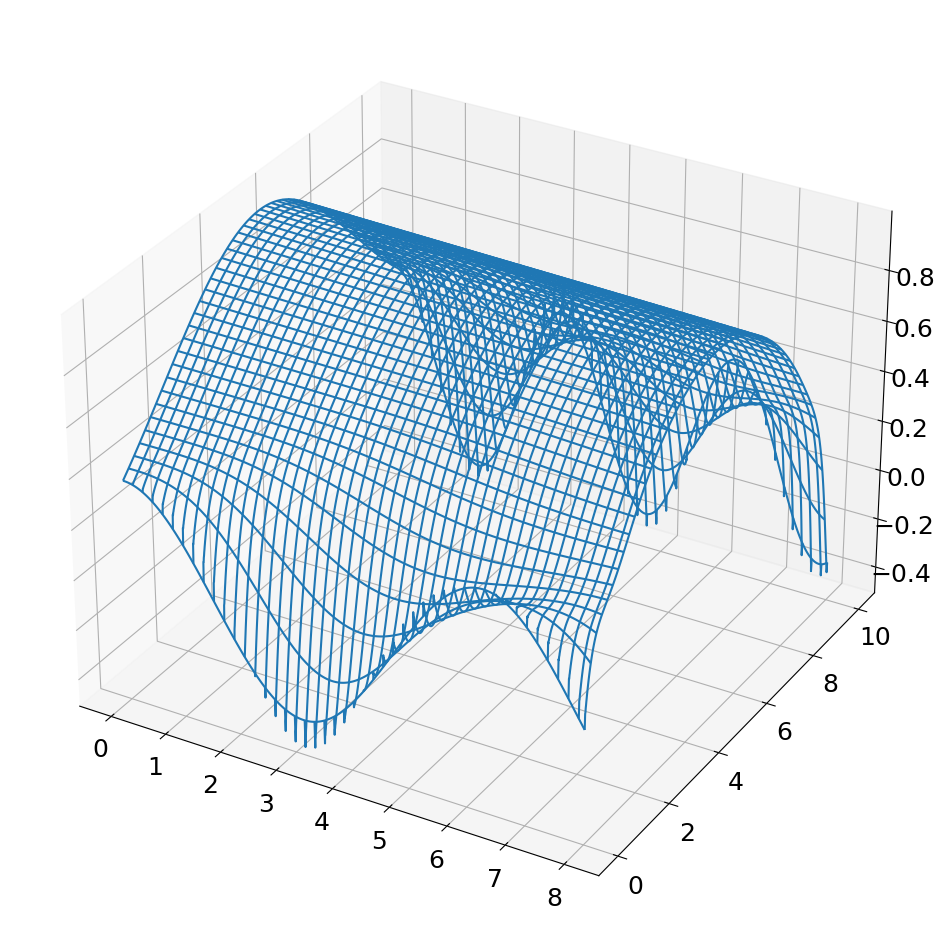

In [2]:
 mu = 1
nu = 0.1

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)

#Def of the initial condition
u0 = np.exp(-(X-5)**2/25) #Condiciòn inicial t = 0


#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat

    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    #ODE resolution -mu*u*u_x+
    u_t =  nu*u_xx

    u_t[0] = -np.exp(-1)*np.sin(t)

    u_t[-1] = -2*np.exp(-1)*np.sin(2*t)
    return u_t.real


#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu, nu, ), mxstep=5000).T


To, Xo= np.meshgrid(T, X)
Z = U

ax = plt.axes(projection ='3d')
ax.plot_wireframe(To, Xo, Z)

plt.show()

El algoritmo de diferencias finitas para ecuación del calor, metiendo condiciones de contorno

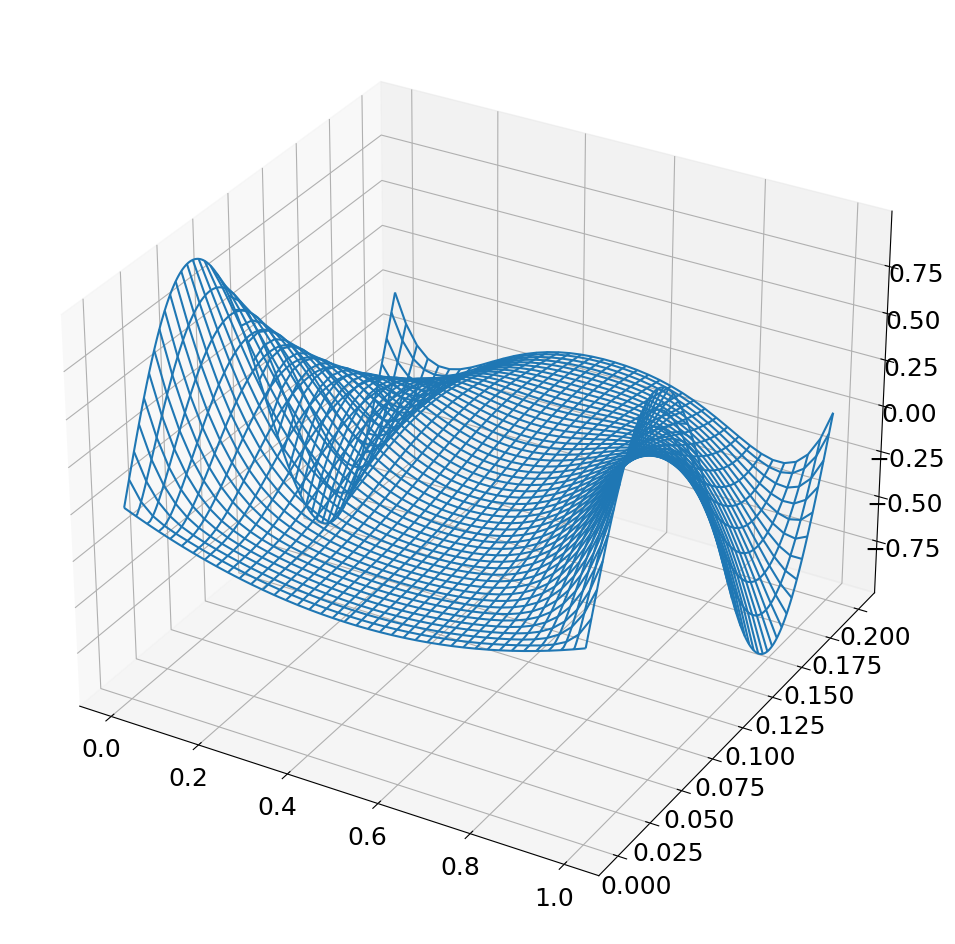

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as mth
from mpl_toolkits.mplot3d import Axes3D



M = 40 # number of grid points for space interval
N = 200 # ''     '' ''   ''     ''  time ''

x0 = 0
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2

dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)


# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = xspan*(xspan-1)
# Boundary conditions
U[0, :] = np.sin(10*np.pi*tspan)
U[-1, :] = np.sin(10*np.pi*tspan)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]


Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()

Este algoritmo que sigue es como les contaba en el mail

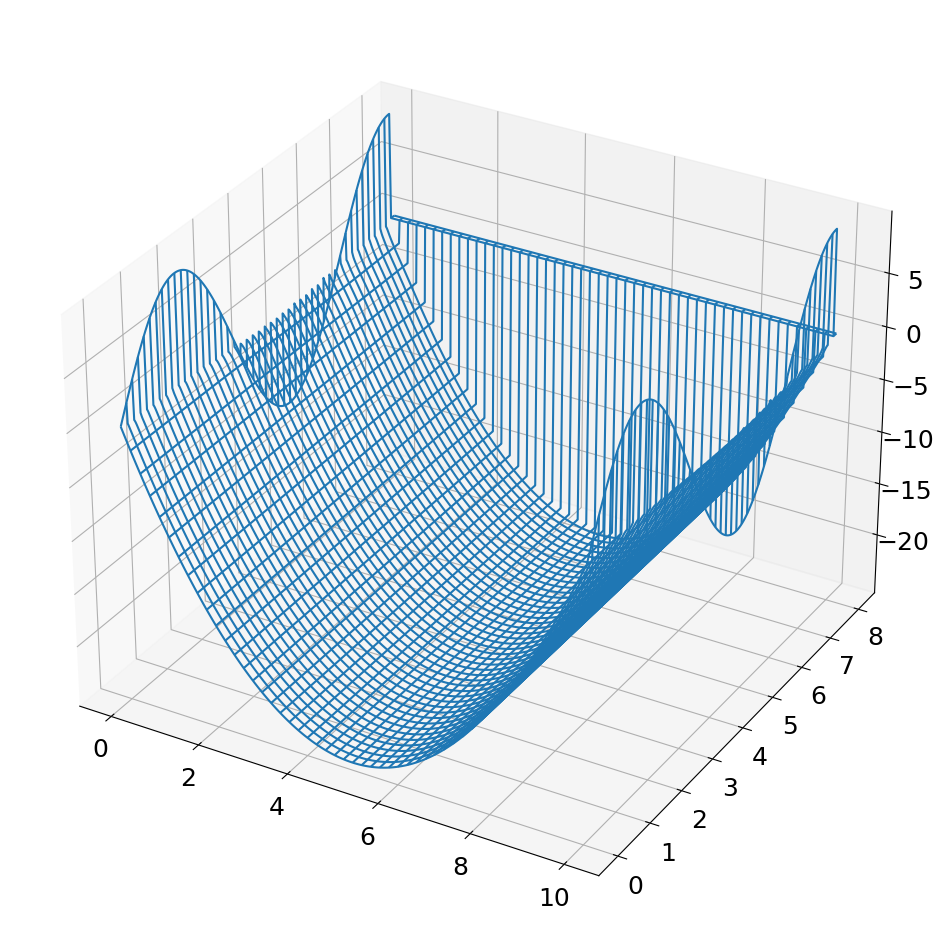

In [4]:


############## MODULES IMPORTATION ###############
import numpy as np
from scipy.integrate import odeint



############## SET-UP THE PROBLEM ###############

mu = 1
nu = 0.01 #kinematic viscosity coefficient

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


 #Single space variable fonction that represent the wave form at t = 0
# viz_tools.plot_a_frame_1D(X,u0,0,L_x,0,1.2,'Initial condition')

############## EQUATION SOLVING ###############

#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u, t, k, mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat

    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    #ODE resolution-mu*u*u_x
    u_t = nu*u_xx
    u[0] = np.sin(t)
    u[-1] = np.cos(t)
    return u_t.real

uo=X*(X-10)
To=np.zeros(5)
W=np.zeros((N_t, N_x))

for l in range(0, int(N_t/5)-1):
  To=np.linspace(5*l*dt, (5*l+4)*dt, 5) # Me hago un tiempo con 5 puntos en cada paso k, corriendo al futuro.
  U=odeint(burg_system, uo, To, args=(k, mu, nu, )) # Esta es la solución con la. condición inicial que, sin embargo, no contempla las condiciones de contorno.
  V=np.delete(U, 0, 1)   #Con esto borro primera columna para luego meter la condición de contorno.
  Y=np.delete(V, -1, 1)   #Con esto borro última columna para hacer lo mismo.
  C=np.c_[10*np.sin(To), Y]
  D=np.c_[C,10*np.sin(To)]
  uo=D[4,:]
  W[5*l: 5*l+5,:]=D # Le estoy metiendo a W la solución de a 5 pasos. Se va llenando hasta contener toda la solución.


Xspano, Tspano = np.meshgrid(X, T)
Z=W
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspano, Tspano, Z)

plt.show()

Más o menos se ve decente, aunque no ideal. Veamos ahora lo mismo pero para la ecuaciòn de Burgers no lineal
$$
u_t+u u_x=\nu u_{xx}
$$


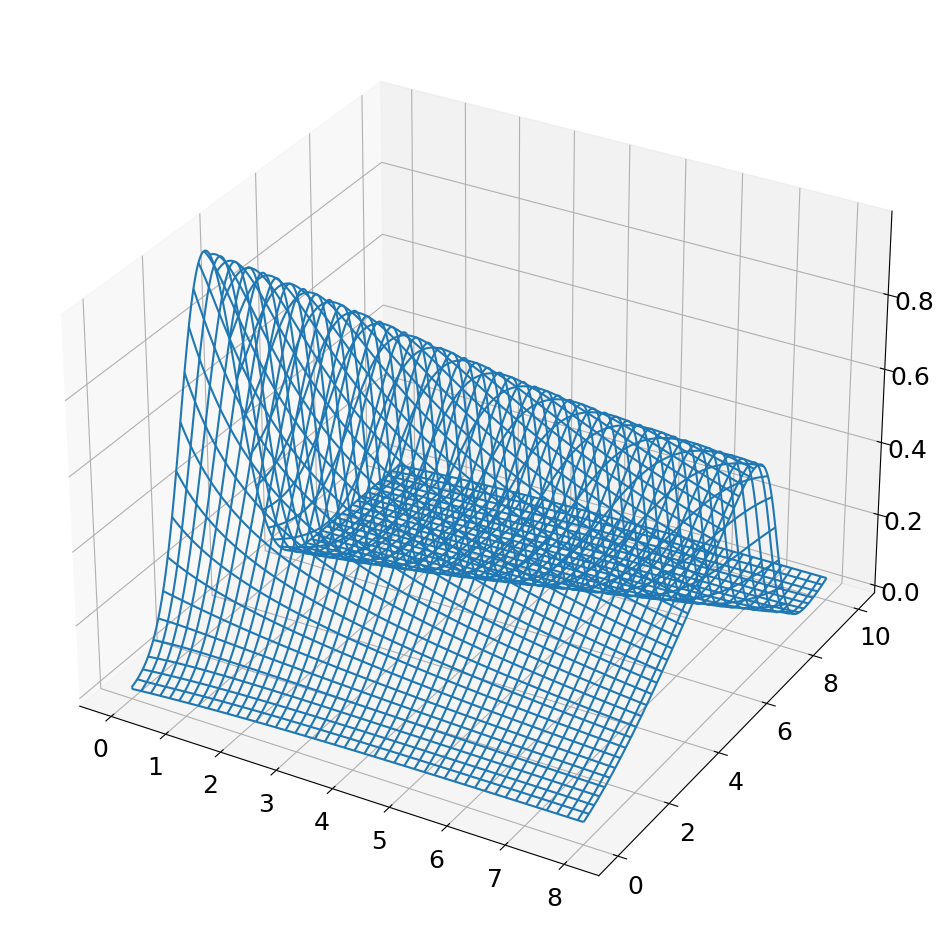

In [5]:
mu = 1
nu = 0.1

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


#Def of the initial condition
u0 = np.exp(-(X-3)**2/2) #Condiciòn inicial t = 0


#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat

    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    #ODE resolution
    u_t =  -mu*u*u_x+nu*u_xx
    return u_t.real


#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu, nu, ), mxstep=5000).T


To, Xo= np.meshgrid(T, X)
Z = U

ax = plt.axes(projection ='3d')
ax.plot_wireframe(To, Xo, Z)

plt.show()

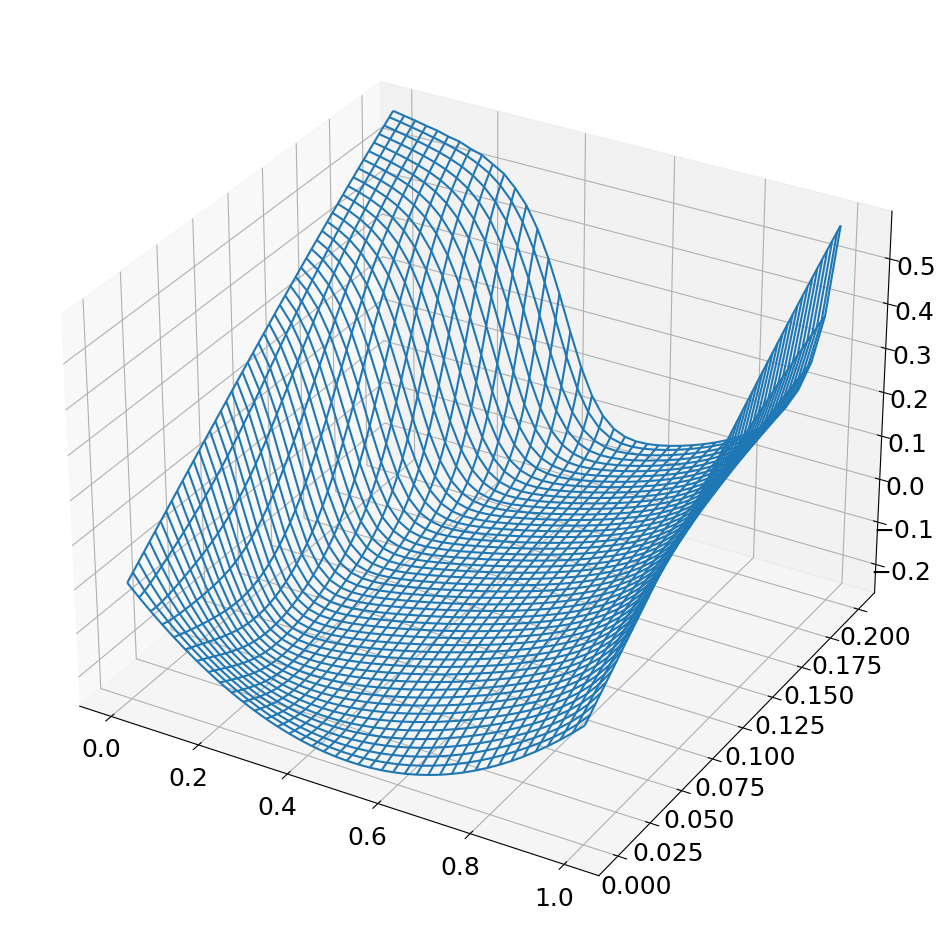

In [6]:



M = 40 # number of grid points for space interval
N = 200 # ''     '' ''   ''     ''  time ''

x0 = 0
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2

dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)


# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = xspan*(xspan-1)
# Boundary conditions
U[0, :] = np.sin(np.pi*tspan)
U[-1, :] = np.sin(np.pi*tspan)

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]-U[i, k]*(U[i, k]-U[i-1, k])


Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()

Si en vez de poner sin(t) ponemos sin(10 t) aparece overflow

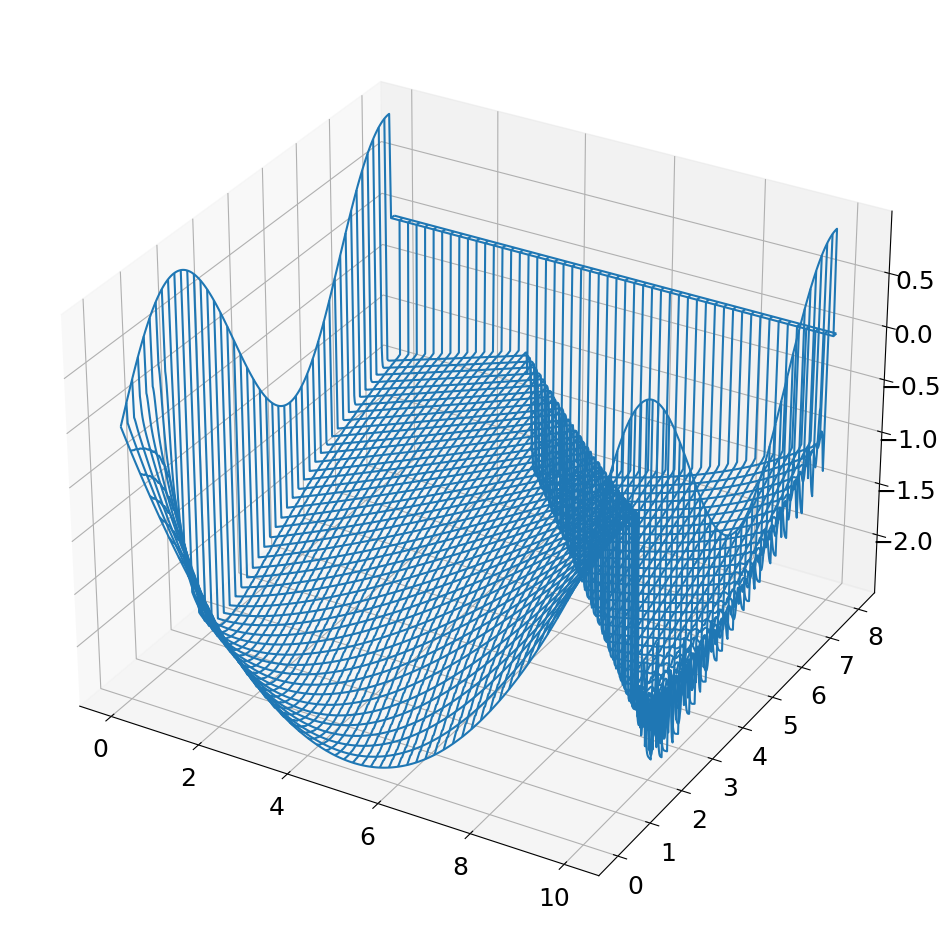

In [7]:

############## MODULES IMPORTATION ###############
import numpy as np
from scipy.integrate import odeint



############## SET-UP THE PROBLEM ###############

mu = 1
nu = 0.01 #kinematic viscosity coefficient

#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)


 #Single space variable fonction that represent the wave form at t = 0
# viz_tools.plot_a_frame_1D(X,u0,0,L_x,0,1.2,'Initial condition')

############## EQUATION SOLVING ###############

#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u, t, k, mu, nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat

    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)

    #ODE resolution
    u_t = nu*u_xx-mu*u*u_x
    return u_t.real

uo=0.1*X*(X-10)
To=np.zeros(5)
W=np.zeros((N_t, N_x))

for l in range(0, int(N_t/5)-1):
  To=np.linspace(5*l*dt, (5*l+4)*dt, 5) # Me hago un tiempo con 5 puntos en cada paso k, corriendo al futuro.
  U=odeint(burg_system, uo, To, args=(k, mu, nu, )) # Esta es la solución con la. condición inicial que, sin embargo, no contempla las condiciones de contorno.
  V=np.delete(U, 0, 1)   #Con esto borro primera columna para luego meter la condición de contorno.
  Y=np.delete(V, -1, 1)   #Con esto borro última columna para hacer lo mismo.
  C=np.c_[np.sin(To), Y]
  D=np.c_[C,np.sin(To)]
  uo=D[4,:]
  W[5*l: 5*l+5,:]=D # Le estoy metiendo a W la solución de a 5 pasos. Se va llenando hasta contener toda la solución.


Xspano, Tspano = np.meshgrid(X, T)
Z=W
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspano, Tspano, Z)

plt.show()

La no linealidad hace cosas. Tuve que cambiar las condiciones de contorno sino tiraba overflow. Finalmente este último es un código simpático que encontré por ahí, solo sirve para la ecuación del calor.

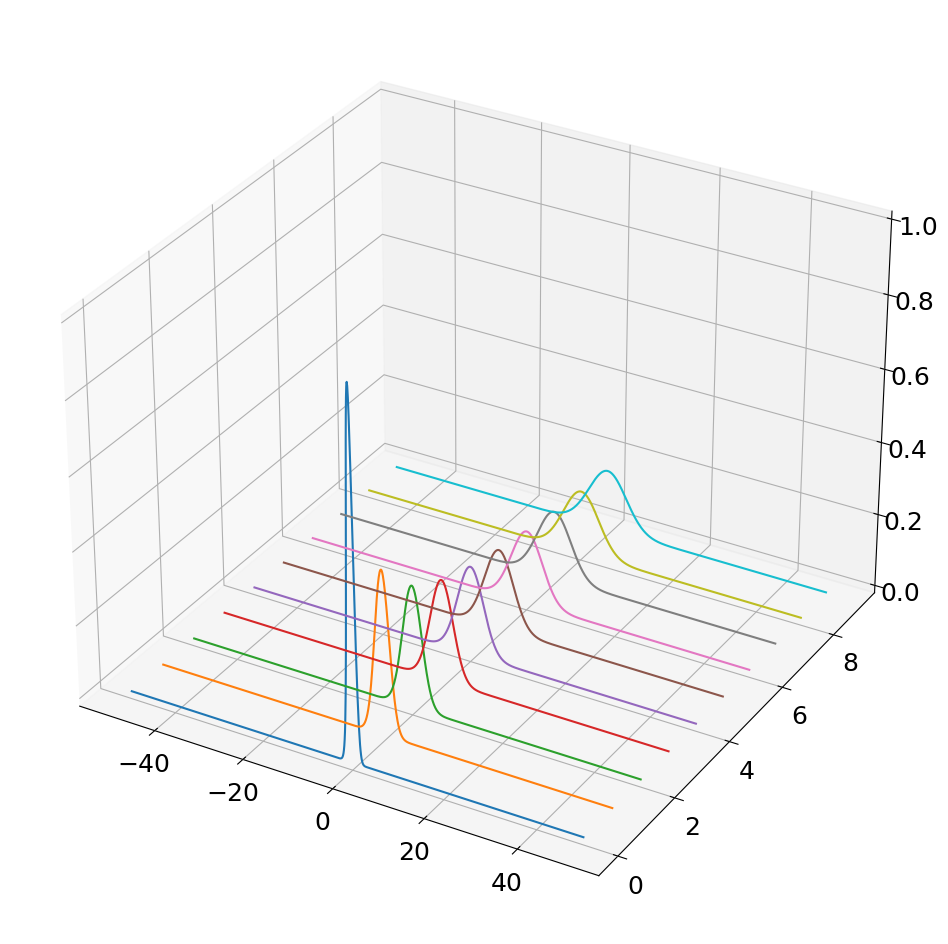

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

a = 1    # Themal difusivity
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0 = np.exp(-x**2)
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * kappa**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:])

In [9]:
m = np.zeros((4, 10))
v = np.ones((2, 10))
c = np.r_[v, m]
print(c)
d=np.delete(c, 1, 1)
print(d)
print(d[0,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


[0.02       0.01778643 0.01562095 0.01354182 0.01157779 0.0097493
 0.00806976 0.00654658 0.00518228 0.00397532]
Solución numérica u(x): [0.         0.         0.15284498 0.29213609 0.4193088  0.53574286
 0.64275071 0.74156887 0.83335188 0.91916854 1.         1.        ]


ValueError: x and y must have same first dimension, but have shapes (10,) and (12,)

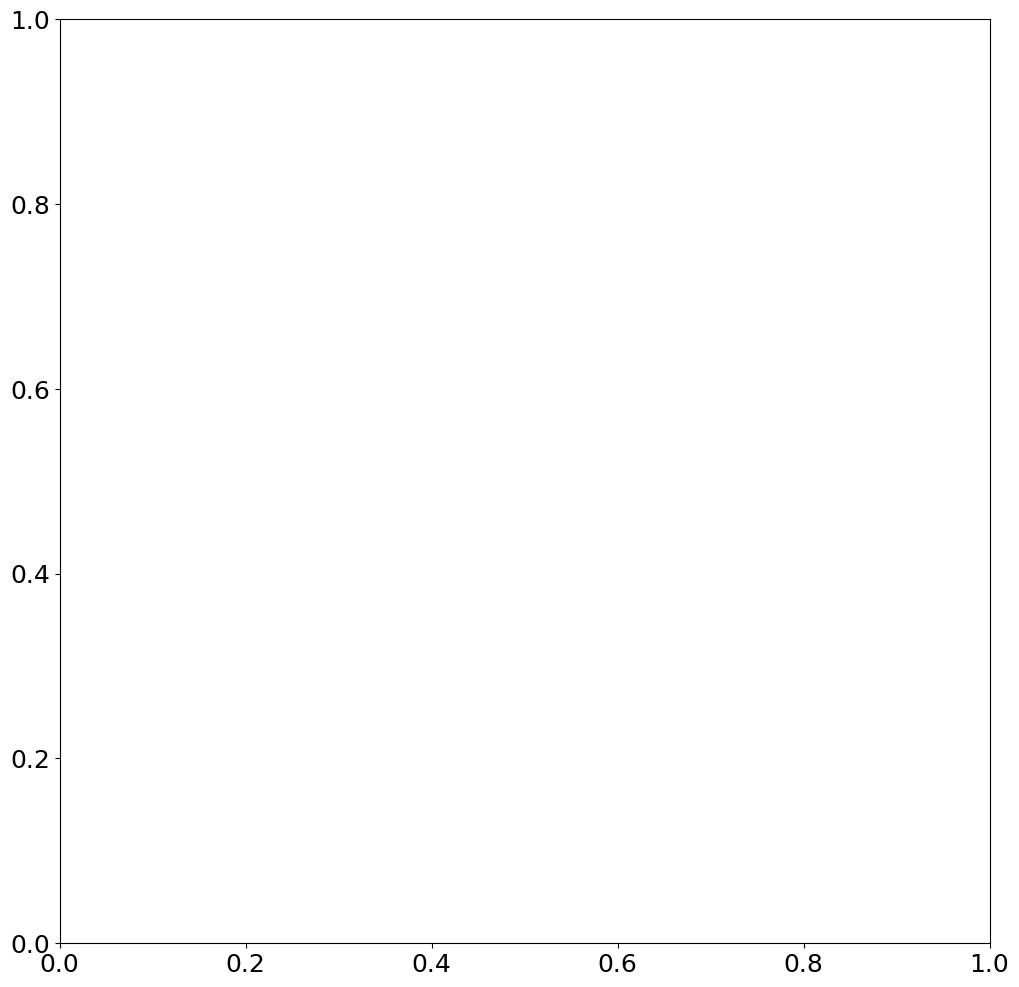

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 10  # número de subintervalos, puedes ajustar este valor
h = 1 / (m)
alpha = 0  # valor de la condición de borde en x=0
beta = 1   # valor de la condición de borde en x=1

# Puntos de malla
x = np.linspace(0, 1, m)

# Función f(x)
def f(x):
    return 2*np.cos(x)/np.exp(x) # ejemplo de función, puedes cambiarla según el problema

def g(x):
    return np.sin(x)/np.exp(x)

# Construcción de la matriz A
A = np.zeros((m, m))

np.fill_diagonal(A, 2)
np.fill_diagonal(A[:-1, 1:], -1)
np.fill_diagonal(A[1:, :-1], -1)
A[0,0] = 1
A[0,1] = 0
A[-1,-1] = 1
A[-1,-2] = 0


# Vector b
b = h**2 * f(x)
print(b)
b[0] = alpha
b[-1] = beta


# Solución del sistema
u_internal = np.linalg.solve(A, b)


print("Solución numérica u(x):", u)

# Graficar la solución numérica y la función g(x)
plt.plot(x, u, label='Solución numérica u(x)')
plt.plot(x, g(x), label='Función g(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()


In [33]:
len(u)

12

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 10  # número de subintervalos, puedes ajustar este valor
h = 1 / (m + 1)
alpha = 0  # valor de la condición de borde en x=0
beta = 1   # valor de la condición de borde en x=1

# Puntos de malla
x = np.linspace(0, 1, m + 2)  # incluye los puntos de borde

# Función f(x)
def f(x):
    return 2*np.cos(x)/np.exp(x) # ejemplo de función, puedes cambiarla según el problema

def g(x):
    return -np.sin(x)/np.exp(x) + np.sin(1)/np.exp(1) * x + 1

# Construcción de la matriz A
A = np.zeros((m, m))

np.fill_diagonal(A, 2)
np.fill_diagonal(A[:-1, 1:], -1)
np.fill_diagonal(A[1:, :-1], -1)
A[0,0] = 1
A[0,1] = 0
A[-1,-1] = 1
A[-1,-2] = 0
print(A)

# Vector b
b = h**2 * f(x)   # excluye los puntos de borde
print(len(x[1:-1]))
b[0] = alpha
b[-1] = beta

# Solución del sistema
u_internal = np.linalg.solve(A, b)

# Agregar condiciones de borde u = np.concatenate(([alpha], u_internal, [beta]))

print("Solución numérica u(x):", u_internal)

# Graficar la solución numérica y la función g(x)
plt.plot(x, u_internal, label='Solución numérica u(x)')
plt.plot(x, g(x), label='Función g(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
10


ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 12 is different from 10)